<a href="https://colab.research.google.com/github/Josh-Warren11/RandomNotes/blob/main/Notebook6_almost%20done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name:
Date:

## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [5]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS167/datasets/chest_xray.zip (Unzipped Files)/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS167/datasets/chest_xray.zip (Unzipped Files)/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [26]:
# Conv Layer 1
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten()) 
model1.add(Dense(64,activation= 'relu')) 
model1.add(Dense(1,activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results = model1.fit_generator(
        train_data, 
        steps_per_epoch = len(train_data), 
        epochs=5,
        validation_data = test_data,
        validation_steps = len(test_data)
        )


Epoch 1/5
163/163 [==============================] - 21s 126ms/step - loss: 0.3804 - accuracy: 0.8299 - val_loss: 0.7910 - val_accuracy: 0.6603
Epoch 2/5
163/163 [==============================] - 20s 125ms/step - loss: 0.2266 - accuracy: 0.9086 - val_loss: 0.5929 - val_accuracy: 0.7532
Epoch 3/5
163/163 [==============================] - 20s 124ms/step - loss: 0.1559 - accuracy: 0.9383 - val_loss: 0.8186 - val_accuracy: 0.7260
Epoch 4/5
163/163 [==============================] - 20s 125ms/step - loss: 0.1323 - accuracy: 0.9500 - val_loss: 0.5418 - val_accuracy: 0.7917
Epoch 5/5
163/163 [==============================] - 20s 125ms/step - loss: 0.1265 - accuracy: 0.9530 - val_loss: 0.6802 - val_accuracy: 0.7692


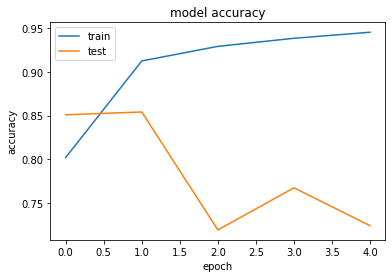

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
#Tuned CNN
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten()) 
#lowered the density number
model2.add(Dense(32,activation= 'relu')) 
model2.add(Dense(1,activation='sigmoid'))

#lowered the momentum
opt = SGD(lr=0.001, momentum=0.8)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results2 = model2.fit_generator(
        train_data, 
        steps_per_epoch = len(train_data), 
        epochs=5,
        validation_data = test_data,
        validation_steps = len(test_data)
        )

Epoch 1/5
163/163 [==============================] - 21s 125ms/step - loss: 0.5016 - accuracy: 0.7567 - val_loss: 0.4733 - val_accuracy: 0.7821
Epoch 2/5
163/163 [==============================] - 20s 125ms/step - loss: 0.2533 - accuracy: 0.9015 - val_loss: 0.5649 - val_accuracy: 0.7452
Epoch 3/5
163/163 [==============================] - 20s 124ms/step - loss: 0.1841 - accuracy: 0.9293 - val_loss: 0.7319 - val_accuracy: 0.7228
Epoch 4/5
163/163 [==============================] - 20s 123ms/step - loss: 0.1575 - accuracy: 0.9390 - val_loss: 0.8293 - val_accuracy: 0.7292
Epoch 5/5
163/163 [==============================] - 20s 122ms/step - loss: 0.1546 - accuracy: 0.9406 - val_loss: 0.8793 - val_accuracy: 0.7276


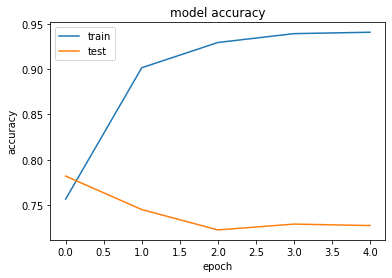

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()